# Exploring Penguin Species & Classification

<b>Analysis and Insights By: David Torgerson

The dataset was collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica Long Term Ecological Research (LTER) Program. Included in the dataset are several variables including bill length, bill depth, body mass, sex, and what island the penguins live on. 

<b>Goal: </b>To perform exploratory data analysis and implement a classification algorithm to try to identify the species of penguin.

##### Data Installation

In [3]:
# pip install palmerpenguins - To be able to load in the dataset

#### Library Import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from palmerpenguins import load_penguins

%matplotlib inline

#### Loading the Data / Dataset Information

In [5]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [7]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Looking at the information above about our dataset, we can see a few things:
 - There are a total of 344 observations
 - There are a total of 8 columns.
   - There are 3 string columns, 4 float columns (can include decimals), and 1 integer column (does not include decimals).
 - There are 5 columns that contain null values. Sex is missing 11 observations. (This can pose some problems with our classification task).

### Exploratory Data Analysis

In [8]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Looking at the descriptive statistics we can make a few notes:
 - The average bill length (mm) is: 44mm
 - The average bill depth (mm) is: 17mm
 - The average flipper length (mm) is: 201mm
 - The average body mass (g) is: 4,201.7g or about 9 pounds.
    
At a glance, it doesn't appear there are any outliers in the data by simply looking at the max values, but we can create some box plots to validate that thought.

<b> Plotting numerical variables

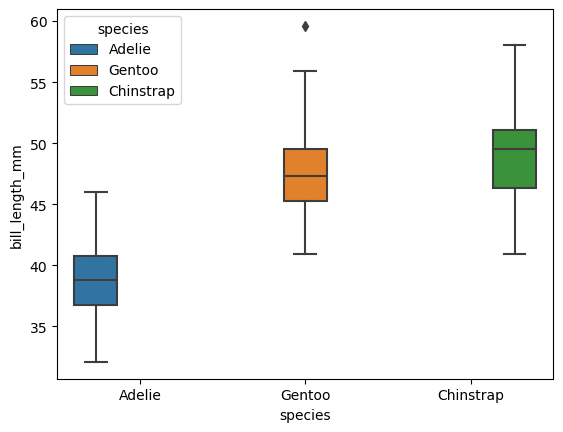

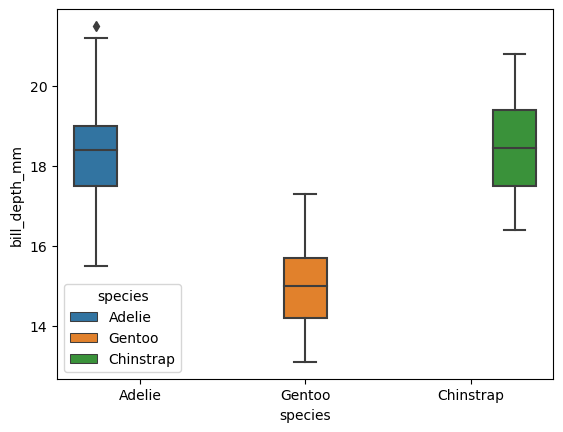

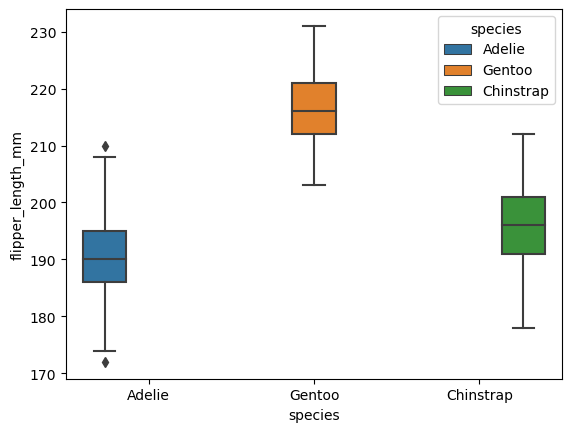

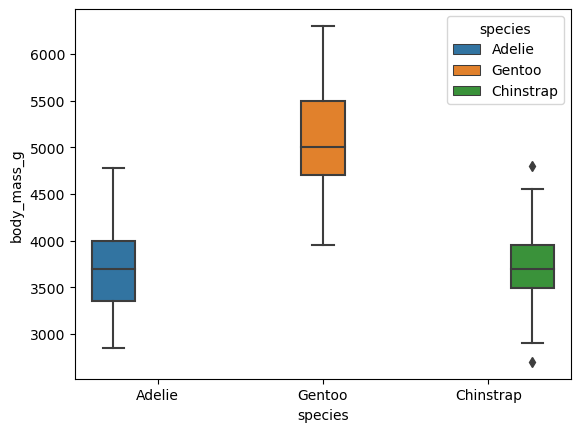

In [9]:
# Here we are looking at the species as a whole to determine if there are any outliers for any of the measurements.

cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in penguins[cols]:
    sns.boxplot(data = penguins, 
           x = 'species',
           y = col,
           hue = 'species')
    #plt.tight_layout()
    plt.show()

Looking at the boxplots created above, we can see there are some outliers:
 - Gentoo has a couple outliers for bill length.
 - Adelie has a few outliers for bill depth.
 - Adelie also has outliers for flipper lenght.
 - Chinstrap penguins have some outliers for body mass.

<B>Breaking down the above boxplots by island

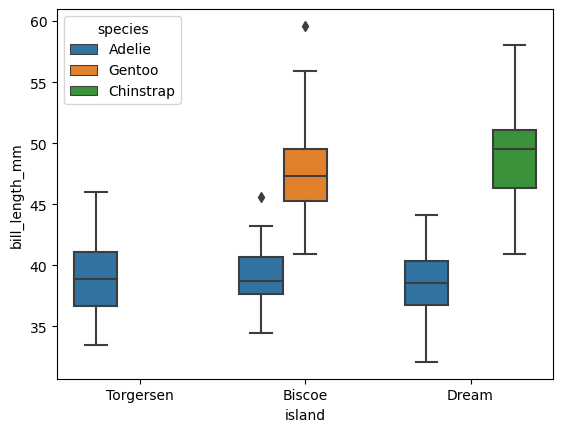

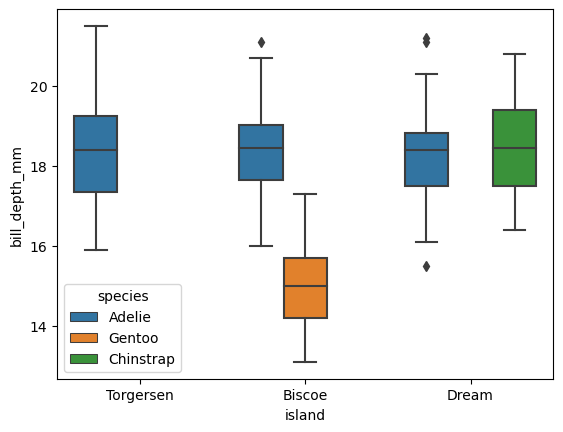

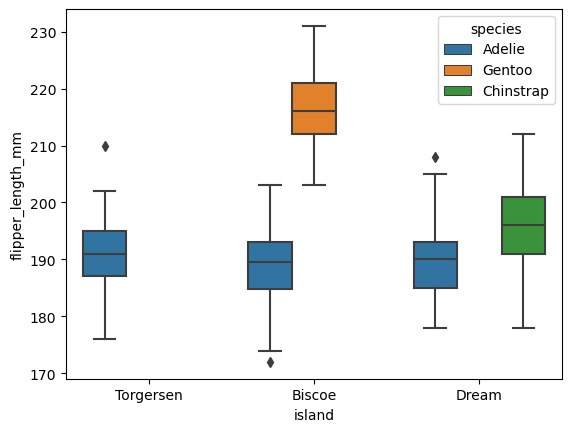

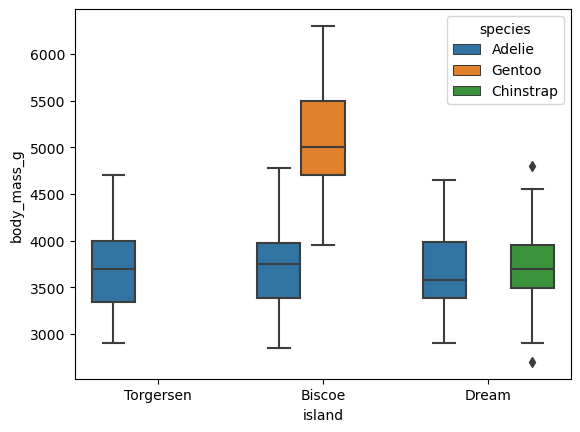

In [10]:
for col in penguins[cols]:
    sns.boxplot(data = penguins, 
               x = 'island',
               y = col,
               hue = 'species')
    plt.show()

The boxplot shows a few things:
 - Torgersen Island only has one species of penguin - Adelie
 - There appear to be two outliers for bill length on Biscoe Island - one for Adelie and Gentoo species.
 - Gentoo penguins were only found on Biscoe Island while Chinstrap penguins were only found on Dream Island.
 - Gentoo and Chinstrap typically have longer bill lengths that Adelie, while chinstrap penguins have the longest bill lengths on average.

The boxplot for bill depth shows us that there are a few outliers the the Aelie species on Biscoe Island and on Dream Island.

<b>Exploring Non-Numerical Columns

<AxesSubplot:>

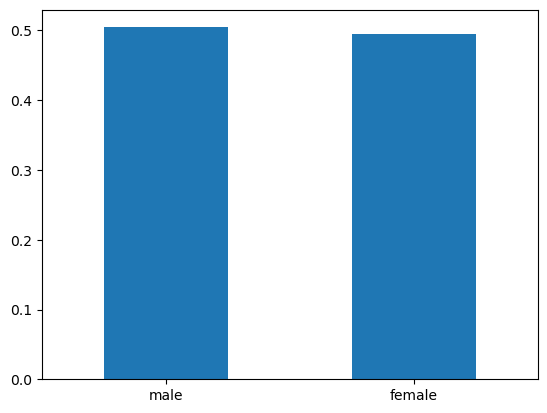

In [11]:
penguins['sex'].value_counts(normalize = True).plot.bar(rot = 0)

In [12]:
penguins['sex'].value_counts(normalize = True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

The data is evenly distributed between sexes at 50% split rounded. The above table confirms what we saw in the barplot.

2009    120
2008    114
2007    110
Name: year, dtype: int64


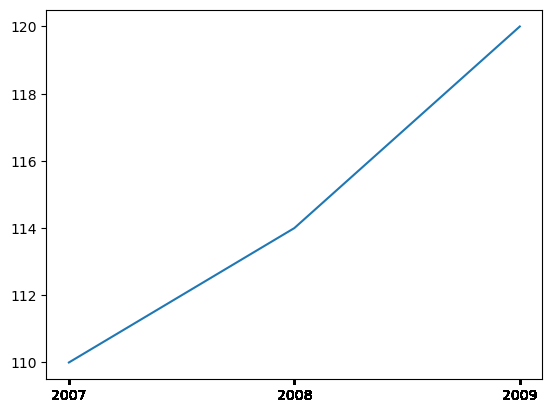

In [13]:
year_size = penguins['year'].value_counts()

print(year_size)

year_size.plot()
plt.xticks(penguins["year"].values)
plt.show()

Data collection is pretty even from year to year, with a slight increase in observations from 2007 - 2009.

<AxesSubplot:xlabel='species', ylabel='count'>

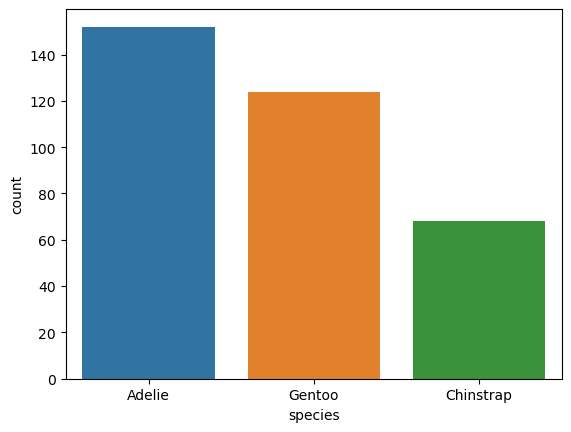

In [14]:
sns.countplot(x = 'species', data = penguins)

The most common species of penguin that was observed was the Adelie while the lowest observed species was the Chinstrap.

### Classification Task

We will use a few different classifiers to identify which method works the best - decision tree classifier vs a random forest classifier. 

The way we will determine how well our models perform in order to compare them is by using the accuracy metric (how well each observation is correctly classified).

#### Import Libraries

In [15]:
from sklearn.model_selection import train_test_split # Creating training & testing data
from sklearn.tree import DecisionTreeClassifier # Used for Decision Tree Classifier modeling
from sklearn.ensemble import RandomForestClassifier # Used for Random Forest Classifier Modeling
from sklearn.preprocessing import LabelEncoder # Used to encode categorical target variable
from sklearn.metrics import confusion_matrix # Used to show predictions vs. actuals.

<B> Cleaning up null values

In [17]:
# First, let's take a look at our null values.
null_values = penguins[penguins.isnull().any(axis = 1)]

null_values

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


Looking at the rows that have null values, it appears that most of the null values appear in the `sex` column, which we will drop for our classification task.

There seems to be two observations that don't have any measurements. Since this accounts for ~0.005% of the data, we will just drop the two rows.

In [18]:
# This will drop all rows with 3 or more null values using the `thresh` argument.
penguins_clean = penguins.dropna(thresh = penguins.shape[1]-3)

# Checking to ensure that only the two rows were dropped.
null_values = penguins_clean[penguins_clean.isnull().any(axis = 1)]

null_values

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


<b> Encoding our categorical target variable

In [20]:
# Transforming my outcome labels.
le = LabelEncoder()

penguins_clean['category_encoded'] = le.fit_transform(penguins_clean['species'])

penguins_clean.head()

/var/folders/z8/7_ymr3455hzg3kfwn7t81b1h0000gn/T/ipykernel_33372/4069581149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean['category_encoded'] = le.fit_transform(penguins_clean['species'])


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,category_encoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0


<b>Creating dummy variables for `island` variable.

In [23]:
# Creating dummy variables for island names.
dummy_df = pd.get_dummies(penguins_clean['island'])

penguins_clean = pd.concat([penguins_clean, dummy_df], axis = 1)

penguins_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,category_encoded,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0,0,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0,0,0,1


<b>Creating training/testing data

In [24]:
# Diving the data into training and testing data.

x = penguins_clean.drop(columns = ['sex', 'year', 'species', 'category_encoded', 'island'])
y = penguins_clean['category_encoded']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 123)

print(x_train.shape)
print(x_test.shape)

<b>Building out our models

Decision Tree Classifier

In [26]:
dtc = DecisionTreeClassifier() # Initiating the classifier

dtc.fit(x_train, y_train) # Fitting (training) the classifier on training data

dtc_pred = dtc.predict(x_test) # Generating predictions on test data

print(dtc.score(x_test, y_test)) # Assessing model accuracy.

0.9420289855072463


Random Forest Classifier

In [27]:
rfc = RandomForestClassifier() # Initiating the classifier.

rfc.fit(x_train, y_train) # Fitting (training) the classifier on training data

rfc_pred = rfc.predict(x_test) # Generating predictions on test data

print(rfc.score(x_test, y_test)) # Assessing model accuracy

0.9710144927536232


In [31]:
# Comparing the two models
print('Decision Tree Classifier Score:', '{:.2%}'.format(dtc.score(x_test, y_test)))
print('Random Forest Classifier Score:', '{:.2%}'.format(rfc.score(x_test, y_test)))

Decision Tree Classifier Score: 94.20%
Random Forest Classifier Score: 97.10%


<b>Confusion Matrices

In [42]:
# Computing Confusion Matrix
dtc_cm = pd.DataFrame(confusion_matrix(y_test, dtc_pred, labels = [0,1,2]))
rfc_cm = pd.DataFrame(confusion_matrix(y_test, rfc_pred, labels = [0,1,2]))

print(dtc_cm)
print(rfc_cm)

    0   1   2
0  24   3   0
1   1  16   0
2   0   0  25
    0   1   2
0  26   1   0
1   1  16   0
2   0   0  25


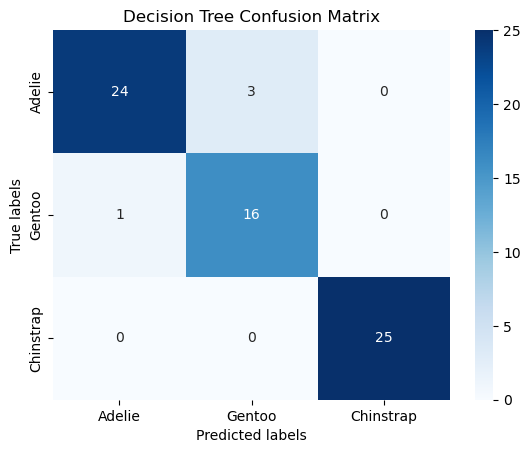

In [52]:
# Visualizing the Decision Tree Confusion Matrix
ax = plt.subplot()
sns.heatmap(dtc_cm, ax = ax, fmt = 'g', cmap = 'Blues', annot = True)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Decision Tree Confusion Matrix')
ax.xaxis.set_ticklabels(['Adelie', 'Gentoo', 'Chinstrap'])
ax.yaxis.set_ticklabels(['Adelie', 'Gentoo', 'Chinstrap']);

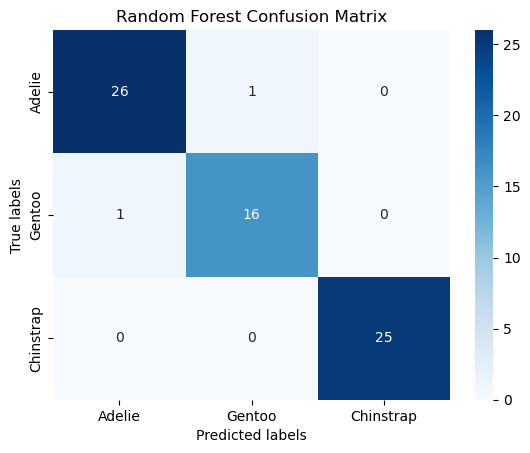

In [53]:
# Visualizing the Random Forest Confusion Matrix
ax = plt.subplot()
sns.heatmap(rfc_cm, ax = ax, fmt = 'g', cmap = 'Blues', annot = True)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Confusion Matrix')
ax.xaxis.set_ticklabels(['Adelie', 'Gentoo', 'Chinstrap'])
ax.yaxis.set_ticklabels(['Adelie', 'Gentoo', 'Chinstrap']);

### Conclusion & Next Steps:

<b>Conclusion:

After implementing two classification models, we can see that our `Random Forest Classifier` out-performed the `Decision Tree Classifier`.

If this was going into production to try to identify what species of penguin we found given the following information: island, bill length, bill depth, flipper length, and body mass, we would correctly predict the species 97% of the time.

<b>Next Steps:

Next steps for the project could be:
 - Use a different classification method (XGBoost Classifier for example).
 - Include more data observations (maybe another species or more measurements on the penguins - like height).
 - Create a integration with github to push/pull with repository.